The Cifar10 dataset consists of 60,000 32*32 colour images in 10 classes, with 6000 images per class.
There are 50,000 train images and 10,000 test images

## Import Necessary Libraries

In [4]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

# Loading cifar10 dataset

In [5]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


## Exploring the dataset

In [6]:
x_train.shape #let`s look at the shape of the train data

(50000, 32, 32, 3)


 So we have 50,000 train images

In [7]:
x_test.shape #let`s look at the shape of the test data

(10000, 32, 32, 3)

and we have 10,000 test images

In [8]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [9]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

y_train,y_test contain the classes from 0-9

In [10]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

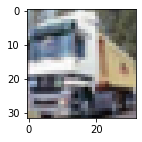

In [11]:
#let`s quickly plot this image using matplotlib
plt.figure(figsize=(15,2))
plt.imshow(x_train[1])

So we can see it`s a truck

In [12]:
#let`s look at the shape of y_train
y_train.shape

(50000, 1)

In [13]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

we can see that y_train is a two dimensional array and we do not need two dimensional array so let`s reshape it

In [14]:
y_train=y_train.reshape(-1,)
y_train.shape

(50000,)

In [15]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

Perfect ! we have reshaped it.

In [16]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [17]:
def plot_sample(x,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

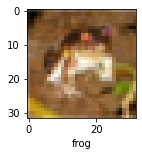

In [18]:
plot_sample(x_train,y_train,0)

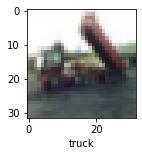

In [19]:
plot_sample(x_train,y_train,2)

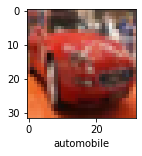

In [20]:
plot_sample(x_train,y_train,5)

## Data Preprocessing

In [21]:
#Before building the model it`s always a good practice to normalize the data
#So let`s do normalization
x_train=x_train/255
x_test=x_test/255

In [22]:
x_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

So now we can see our values are normalized (i.e ranges between 0-1 )

## Bulding Simple Artificial Neural Network (ANN) first

In [25]:
ann = models.Sequential([
                          layers.Flatten(input_shape=(32,32,3)),
                          layers.Dense(3000,activation="relu"),
                          layers.Dense(1000,activation="relu"),
                          layers.Dense(10,activation="sigmoid")
])
ann.compile(optimizer="SGD",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
ann.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.9195 - accuracy: 0.3108
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6375 - accuracy: 0.4215
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5449 - accuracy: 0.4540
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4848 - accuracy: 0.4738
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4351 - accuracy: 0.4941


So we can see after 5 epochs accuracy is almost 49% on training samples which is pretty low.
We will see how accuracy will increase when we will use Convolutional Neural Network (CNN).

let`s evaluate it on test samples

In [26]:
ann.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.5550 - accuracy: 0.4330


[1.5550016164779663, 0.43299999833106995]

So we can see ANN is performing really bad on this dataset

## Classification report when using ANN

In [27]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_predicted=ann.predict(x_test)

In [29]:
y_predicted[0]

array([0.3865708 , 0.8098852 , 0.7158599 , 0.8328079 , 0.44827428,
       0.71055156, 0.6140141 , 0.07638209, 0.63121766, 0.10256945],
      dtype=float32)

In [30]:
y_predicted_classes = [np.argmax(element) for element in y_predicted]

In [31]:
y_predicted_classes[0]

3

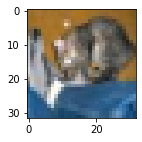

In [33]:
plt.figure(figsize=(15,2))
plt.imshow(x_test[0])

In [34]:
print("Classification Report: \n",classification_report(y_test,y_predicted_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.65      0.43      0.52      1000
           1       0.29      0.91      0.44      1000
           2       0.34      0.47      0.39      1000
           3       0.43      0.13      0.20      1000
           4       0.45      0.34      0.39      1000
           5       0.43      0.33      0.37      1000
           6       0.56      0.44      0.49      1000
           7       0.54      0.57      0.56      1000
           8       0.67      0.44      0.53      1000
           9       0.61      0.26      0.36      1000

    accuracy                           0.43     10000
   macro avg       0.50      0.43      0.43     10000
weighted avg       0.50      0.43      0.43     10000



## Building Convolutional Neural Network (CNN)

In [41]:
cnn = models.Sequential([
                          #cnn
                          layers.Conv2D(filters=32,kernel_size=(3,3),input_shape=(32,32,3),activation="relu"),
                          layers.MaxPool2D((2,2)),
                          
                          layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"),
                          layers.MaxPool2D((2,2)),
                          
                          layers.Conv2D(filters=128,kernel_size=(3,3),activation="relu"),
                          layers.MaxPool2D((2,2)),
                          
                          #dense layers
                          layers.Flatten(),
                          layers.Dense(64,activation="relu"),
                          layers.Dense(10,activation="softmax")
])
cnn.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 6s 3ms/step - loss: 1.7878 - accuracy: 0.3394
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2461 - accuracy: 0.5561
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0667 - accuracy: 0.6249
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9406 - accuracy: 0.6691
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8420 - accuracy: 0.7051
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7723 - accuracy: 0.7325
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7171 - accuracy: 0.7504
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6656 - accuracy: 0.7676
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6222 - accuracy: 0.7815
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.581

So we can see that after using CNN we are getting almost 80% accuracy.Actually if we compare it with ANN than after 5 epochs we are getting 70% accuracy but in ANN our accuracy was very less.
I have also checked it using "SGD" as optmizer but "adam" works well here.

let`s evaluate it on test samples

In [42]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.9029 - accuracy: 0.7113


[0.9028596878051758, 0.7113000154495239]

so on test samples, we are getting 71% accuracy which is pretty good. 

In [43]:
y_predicted=cnn.predict(x_test)

In [44]:
y_predicted[0]

array([2.6771850e-03, 1.1888658e-04, 3.3332042e-03, 9.1440570e-01,
       1.0575595e-02, 4.3624323e-02, 2.0809850e-02, 1.6943729e-03,
       2.6441950e-03, 1.1667219e-04], dtype=float32)

In [47]:
y_predicted_classes=[np.argmax(element) for element in y_predicted]

In [54]:
y_predicted_classes[7]

4

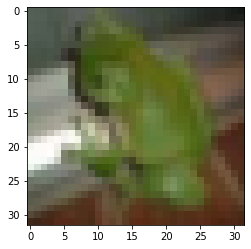

In [55]:
plt.imshow(x_test[7])

## Classification report when using ANN

In [58]:
from sklearn.metrics import confusion_matrix,classification_report
print("classification report: \n",classification_report(y_test,y_predicted_classes))

classification report: 
               precision    recall  f1-score   support

           0       0.78      0.73      0.75      1000
           1       0.89      0.74      0.81      1000
           2       0.65      0.58      0.61      1000
           3       0.47      0.60      0.53      1000
           4       0.62      0.71      0.66      1000
           5       0.66      0.58      0.62      1000
           6       0.75      0.81      0.78      1000
           7       0.79      0.74      0.76      1000
           8       0.84      0.79      0.81      1000
           9       0.77      0.83      0.80      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000



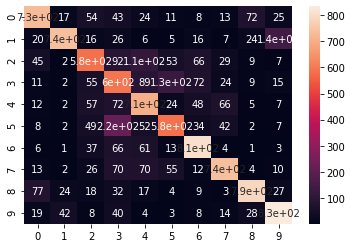

In [62]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_predicted_classes),annot=True)

So by the help of confusion matrix we can see that where our model went wrong.